<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 실습 목표

- CSV 파일에서 데이터를 읽어올 수 있습니다.
- 결측치를 확인하고 제거하거나 다른 값으로 채울 수 있습니다.
- 가변수를 만들 수 있습니다.
- 데이터 표준화와 정규화를 할 수 있습니다.

# P5. 데이터프레임 변경(2)

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

1) 'titanic_simple.csv' 파일을 불러와 데이터프레임 **titanic**을 만드세요.

- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'

In [2]:
# titanic 데이터 불러로기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep = ',')

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


## [실습1] 결측치 처리

2) drop() 메소드를 사용해 PassengerId, Name 열을 제거하세요.

In [3]:
# PassengerId, Name 열 제거
titanic.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# 확인
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southhampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southhampton
3,1,1,female,35.0,53.1000,Southhampton
4,0,3,male,35.0,8.0500,Southhampton


2) value_counts() 메소드를 사용해 Age 열에 NaN 값을 포함해서 어떤 값이 몇 개씩 있는지 확인하세요.

In [4]:
# Age 열 값 개수 확인
titanic['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

3) dropna() 메소드로 Age 열이 NaN인 행은 모두 삭제한 후, 앞에서 작성한 구문을 수행해 NaN값이 없어짐을 확인하세요.

In [5]:
# Age 열 값이 NaN인 행 삭제
titanic.dropna(subset=['Age'], inplace=True)

4) info() 메소드를 사용해 아직도 NaN 값이 있는 열이 있는지 확인하세요.

In [6]:
# 행 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
 5   Embarked  712 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 39.0+ KB


5) fillna() 메소드를 사용해 Embarked 열의 NaN 값은 Southhampton로 채우세요.

In [7]:
# NaN 값 채우기
titanic['Embarked'].fillna('Southhampton', inplace=True)    

6) value_counts() 메소드를 사용해서 Embarked 열에 NaN 값이 있는지 확인하세요.

In [8]:
# 확인
titanic['Embarked'].value_counts(dropna=False)

Southhampton    556
Cherbourg       130
Queenstown       28
Name: Embarked, dtype: int64

## [실습2] 가변수

7) pd.get_dummies() 함수로 Pclass 열을 가변수로 변환한 후 pd.concat() 함수로 기존 데이터프레임에 붙이세요.
- 단  다중공선성(Multicollinearity) 문제는 고려하지 마세요.

In [9]:
# Dummy Variable 만들기
titanic_pclass = pd.get_dummies(titanic['Pclass'], drop_first=False)

# 확인
titanic_pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [10]:
# 기존 데이터프레임에 붙이기
titanic = pd.concat([titanic, titanic_pclass], axis=1)

# 확인
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,1,2,3
0,0,3,male,22.0,7.2500,Southhampton,0,0,1
1,1,1,female,38.0,71.2833,Cherbourg,1,0,0
2,1,3,female,26.0,7.9250,Southhampton,0,0,1
3,1,1,female,35.0,53.1000,Southhampton,1,0,0
4,0,3,male,35.0,8.0500,Southhampton,0,0,1


8) rename() 메소드를 사용해 가변수에서 연결된 열 이름을 Pclass_1, Pclass_2, Pclass_3 로 변경하세요.

In [11]:
# 열 이름 변경
titanic.rename(columns = {1:'Pclass_1', 2: 'Pclass_2', 3: 'Pclass_3'}, inplace=True)

# 확인
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,7.2500,Southhampton,0,0,1
1,1,1,female,38.0,71.2833,Cherbourg,1,0,0
2,1,3,female,26.0,7.9250,Southhampton,0,0,1
3,1,1,female,35.0,53.1000,Southhampton,1,0,0
4,0,3,male,35.0,8.0500,Southhampton,0,0,1


## [실습3] 표준화 & 정규화

9) box plot 그래프로 Fare 열 데이터 분포를 확인하세요.

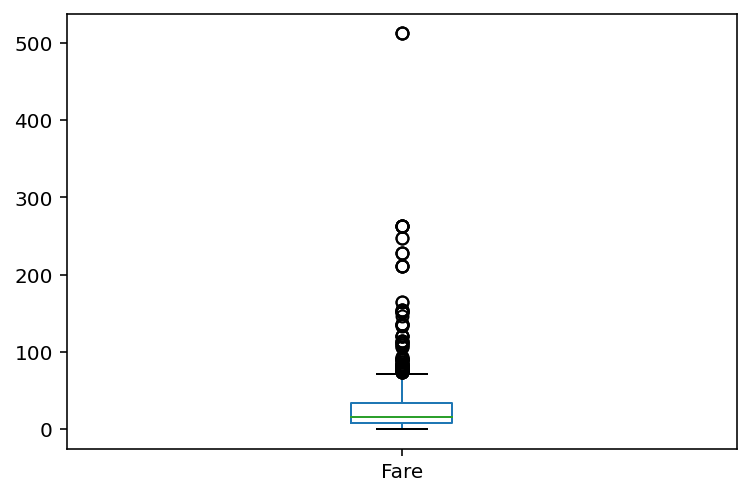

In [12]:
# Fare 열 데이터 분포 확인
titanic.plot(kind='box', y='Fare')
plt.show()

10) Fare 열 값을 다음 공식을 참고해 표준화 하세요.

- 표준화 공식: (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()

In [13]:
# Fare 열 표준화
titanic['Fare'] = (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()

# 확인
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,-0.518614,Southhampton,0,0,1
1,1,1,female,38.0,0.691412,Cherbourg,1,0,0
2,1,3,female,26.0,-0.505859,Southhampton,0,0,1
3,1,1,female,35.0,0.347805,Southhampton,1,0,0
4,0,3,male,35.0,-0.503497,Southhampton,0,0,1


11) Fare 열 값이 -0.5 ~ 0.5 사이인 값만 추출해 titanic2 데이터프레임으로 copy() 메소드를 사용해 복사하세요.

In [14]:
# titanic2 데이터프레임 만들기
titanic2 = titanic[titanic['Fare'].between(-0.5, 0.5)].copy()

12) **titanic2** 데이터프레임의 Fare 열 데이터 분포를 box plot으로 확인하세요.

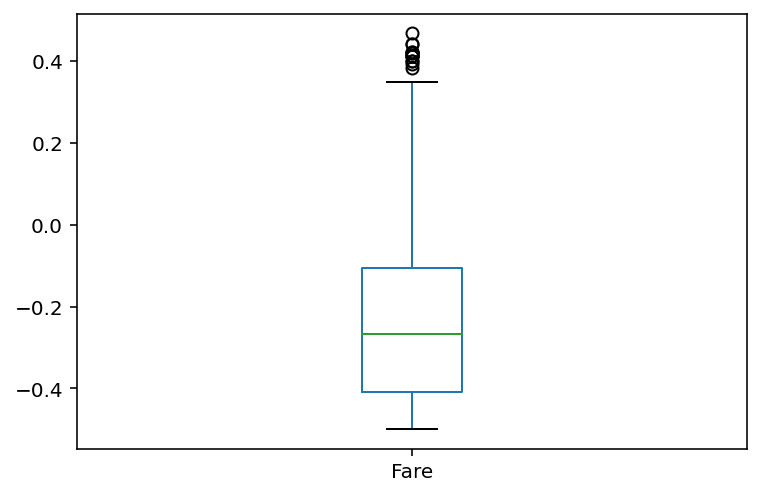

In [15]:
# Fare 열 데이터 분포 확인
titanic2.plot(kind='box', y='Fare')
plt.show()

13) 다음 공식을 참고해서 **titanic2** 데이터프레임의 Fare 열 값을 정규화 하세요.

- 정규화 공식: (titanic2['Fare'] - titanic2['Fare'].min()) / (titanic2['Fare'].max() - titanic2['Fare'].min())

In [16]:
# Fare 열 정규화
titanic2['Fare'] = (titanic2['Fare'] - titanic2['Fare'].min()) / (titanic2['Fare'].max() - titanic2['Fare'].min())

# 확인
titanic2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
3,1,1,female,35.0,0.876712,Southhampton,1,0,0
6,0,1,male,54.0,0.852495,Southhampton,1,0,0
7,0,3,male,2.0,0.250000,Southhampton,0,0,1
8,1,3,female,27.0,0.055446,Southhampton,0,0,1
9,1,2,female,14.0,0.426043,Cherbourg,0,1,0


14) **titanic2** 데이터프레임의 Fare 열 데이터 분포를 box plot으로 확인하세요.

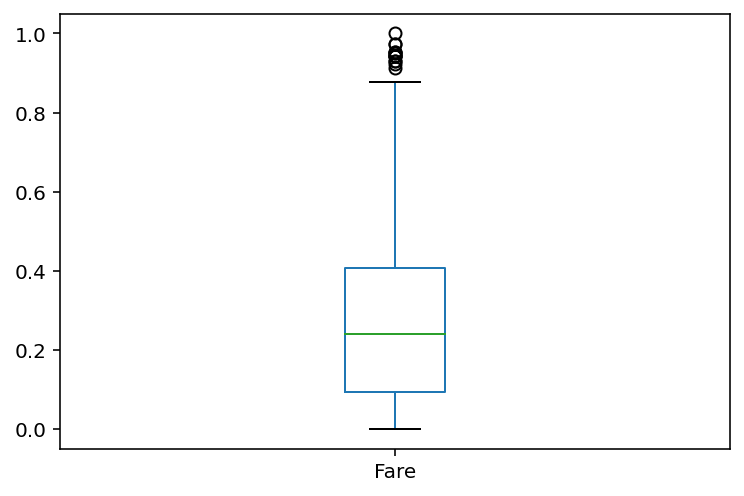

In [17]:
# Fare 열 데이터 분포 확인
titanic2.plot(kind='box', y='Fare')
plt.show()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>